In [1]:
!pip install inference-sdk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.12.15
    Uninstalling aiohttp-3.12.15:
      Successfully uninstalled aiohttp-3.12.15


In [2]:
pip install requests


In [3]:
from inference_sdk import InferenceHTTPClient

# Initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",  # Use detect.roboflow.com
    api_key="AEds2Afj8HvtEGEj0nKA"  # 🔑 replace with your Roboflow API key
)


In [4]:
from google.colab import files
uploaded = files.upload()

# This will let you select an image from your computer
# The uploaded file will be saved in Colab's current directory


Saving broken-teeth-gear-mechanical-workshop-repair-concept-closeup-isolated-154577450.webp to broken-teeth-gear-mechanical-workshop-repair-concept-closeup-isolated-154577450.webp


In [7]:
!pip install inference-sdk

from inference_sdk import InferenceHTTPClient

# Initialize client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="AEds2Afj8HvtEGEj0nKA"   # replace with your Roboflow key
)

# Upload an image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # get uploaded filename

# Run inference
result = CLIENT.infer(image_path, model_id="gear-fault-dms0r/1")  # check model_id in Roboflow Deploy tab
print(result)


Saving download.jpg to download.jpg
{'inference_id': '9c20f8f1-70f5-47ec-aebe-7b01e827d4e7', 'time': 0.03368313400005718, 'image': {'width': 275, 'height': 183}, 'predictions': [{'x': 145.0, 'y': 89.5, 'width': 194.0, 'height': 175.0, 'confidence': 0.9375221729278564, 'class': 'Fault-Exist', 'class_id': 0, 'detection_id': '1a86e83f-8d23-4d5a-970b-19309e52ece2'}]}


Saving broken-teeth-gear-mechanical-workshop-repair-concept-closeup-isolated-154577450.webp to broken-teeth-gear-mechanical-workshop-repair-concept-closeup-isolated-154577450 (1).webp

🔍 Running inference on: broken-teeth-gear-mechanical-workshop-repair-concept-closeup-isolated-154577450 (1).webp
Raw result: {'inference_id': '3ce7694b-1476-428c-97b6-e6ee97603ee0', 'time': 0.059746769000412314, 'image': {'width': 1600, 'height': 1157}, 'predictions': [{'x': 968.0, 'y': 689.0, 'width': 1262.0, 'height': 314.0, 'confidence': 0.9196262359619141, 'class': 'Fault-Exist', 'class_id': 0, 'detection_id': '0369ebf6-910c-4227-bc65-435eaa17a8ee'}]}


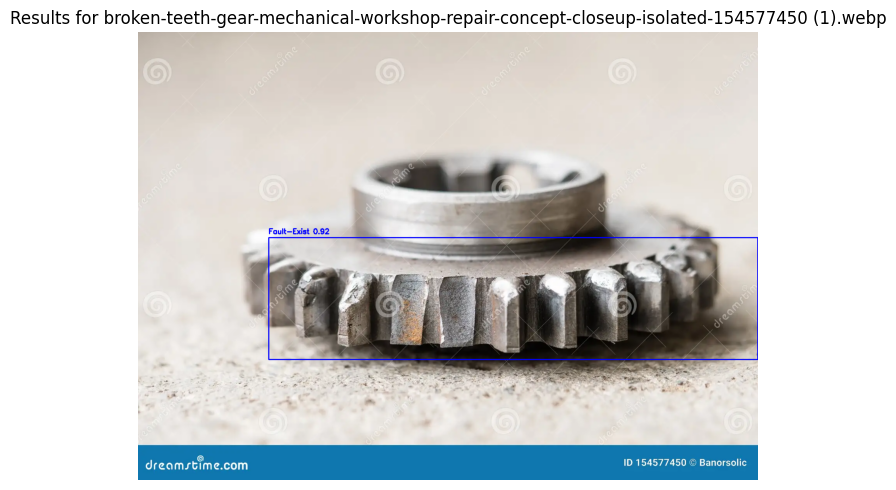

⚙️ Defects: 0/1 (0.00%)


In [9]:
# Step 1: Install the SDK
!pip install inference-sdk

# Step 2: Import libraries
from inference_sdk import InferenceHTTPClient
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Initialize the Roboflow client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="AEds2Afj8HvtEGEj0nKA"   # 🔑 Replace with your real API key
)

# Step 4: Upload images
uploaded = files.upload()
image_files = list(uploaded.keys())

# Step 5: Process each uploaded image
for image_path in image_files:
    print(f"\n🔍 Running inference on: {image_path}")

    # Run inference
    result = CLIENT.infer(image_path, model_id="gear-fault-dms0r/1")  # ⚠️ check model_id in Deploy tab
    print("Raw result:", result)

    # Load image
    image = cv2.imread(image_path)

    # Counters for defect vs non-defect
    defect_count, total_count = 0, 0

    # Draw predictions
    for pred in result['predictions']:
        x, y, w, h = pred['x'], pred['y'], pred['width'], pred['height']
        class_name = pred['class']
        conf = pred['confidence']

        # Convert center coords to top-left and bottom-right
        x1, y1 = int(x - w/2), int(y - h/2)
        x2, y2 = int(x + w/2), int(y + h/2)

        # Color code: defect = red, non-defect = green
        color = (0,255,0) if class_name.lower() == "non-defect" else (255,0,0)

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f"{class_name} {conf:.2f}", (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        # Count defects
        total_count += 1
        if class_name.lower() == "defect":
            defect_count += 1

    # Show annotated image
    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Results for {image_path}")
    plt.show()

    # Calculate and print defect percentage
    if total_count > 0:
        defect_percentage = (defect_count / total_count) * 100
        print(f"⚙️ Defects: {defect_count}/{total_count} ({defect_percentage:.2f}%)")
    else:
        print("⚠️ No objects detected.")
